In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Предсказание покупки в онлайн-магазине

Задача заключается в предсказании намерении пользователя купить какой-либо продукт в интернет-магазине на основе информации о сессии.

## Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/olegov99/hse-ds-course/master/online_shoppers_intention.csv"
data_raw = pd.read_csv(url)

Датасет содержит данные о 12 330 сессиях, проведенных различными пользователями на сайте некоторого онлайн-магазина. Каждый объект имеет 18 признаков: 10 количественных, 6 категориальных и 2 бинарных.

Вначае выведем размерность таблицы:

In [3]:
data_raw.shape

(12330, 18)

Далее, отобразим первые 5 элементов датасета:

In [4]:
data_raw.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Затем, покажем последние элементы таблицы:

In [5]:
data_raw.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Опишем каждый признак.

Количественные признаки:

1.   `Administrative` - количество страниц, связанных с управлением аккаунтом, которые посетил пользователь
2.   `Administrative_Duration` - общее время, проведенное пользователем на страницах категории **Administrative**
3.   `Informational` - количество страниц, содержащих информацию об интернет-магазине (контакты, адрес и т.д.), которые посетил пользователь
4.   `Informational_Duration` - общее время, проведенное пользователем на страницах категории **Informational**
5.   `ProductRelated` - количество страниц, описывающих продукты, которые посетил пользователь
6.   `ProductRelated_Duration` - общее время, проведенное пользователем на страницах категории **ProductRelated**
7.   `BounceRates` - усредненный показатель отказов для страниц, посещенных пользователем
8.   `ExitRates` - усредненный показатель выходов для страниц, посещенных пользователем
9.   `PageValues` - усредненный показатель значимости для страниц, посещенных пользователем
10.   `SpecialDay` - близость к специальному дню (праздник, акция и т.д.)

Категориальные признаки:
11.   `OperatingSystems` - операционная система пользователя
12.   `Browser` - браузер пользователя
13.   `Region` - месторасположение пользователя
14.   `TrafficType` - ресурс, с которого пользователь перешел в интернет-магазин (банер, смс, директ и т.д.)
15.   `VisitorType` - тип пользователя: Новый пользователь, Повторный пользователь, Другой
16.   `Weekend` - выходной ли день или нет
17.   `Месяц` - месяц посещения
18.   `Revenue` - индикатор, показывающий сделал ли пользователь покупку




In [6]:
data_raw.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

## Обработка данных

In [7]:
data = data_raw;

# binary_columns = ['Weekend', 'Revenue']
# for column in binary_columns:
#   data[column] = data[column].replace(True, 1)
#   data[column] = data[column].replace(False, 0)

In [8]:
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for column in categorical_columns:
  data[column] = data[column].astype('category')

In [9]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [10]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

Типы данных готовы для дальнейшего анализа. Проверим наличие пропущенных значений:

In [11]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Как мы видим - пропущенных значений не оказалось.

In [12]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [13]:
data.describe(include=['category', 'bool'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


Из таблички выше видим, что датасет достаточно несбалансированный, т.е. одному классу принадлежит 10422 (84.5%) объектов, а второму 1908.

## Визуализация данных

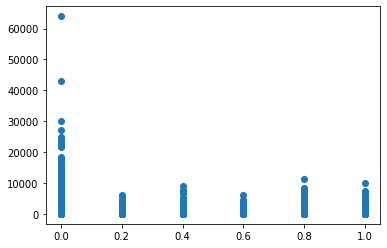

In [20]:
plt.scatter(data['SpecialDay'], data['ProductRelated_Duration'])

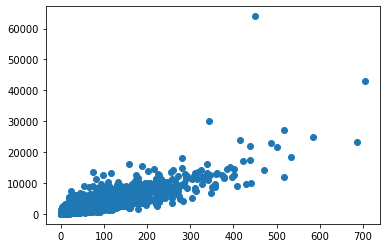

In [15]:
plt.scatter(data['ProductRelated'], data['ProductRelated_Duration'])

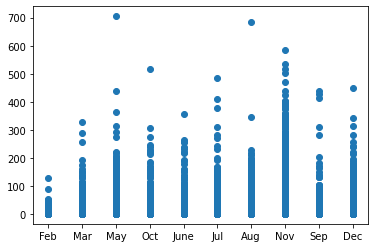

In [22]:
plt.scatter(data['Month'], data['ProductRelated'])

In [23]:
data['ProductRelated_Duration'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        0.000000
0.010        0.000000
0.050        0.000000
0.100       36.000000
0.500      598.936905
0.900     2877.863333
0.950     4300.289077
0.990     8701.142697
0.995    11242.807460
Name: ProductRelated_Duration, dtype: float64

Построим все возможные диаграммы рассеивания для каждой пары признаков:

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


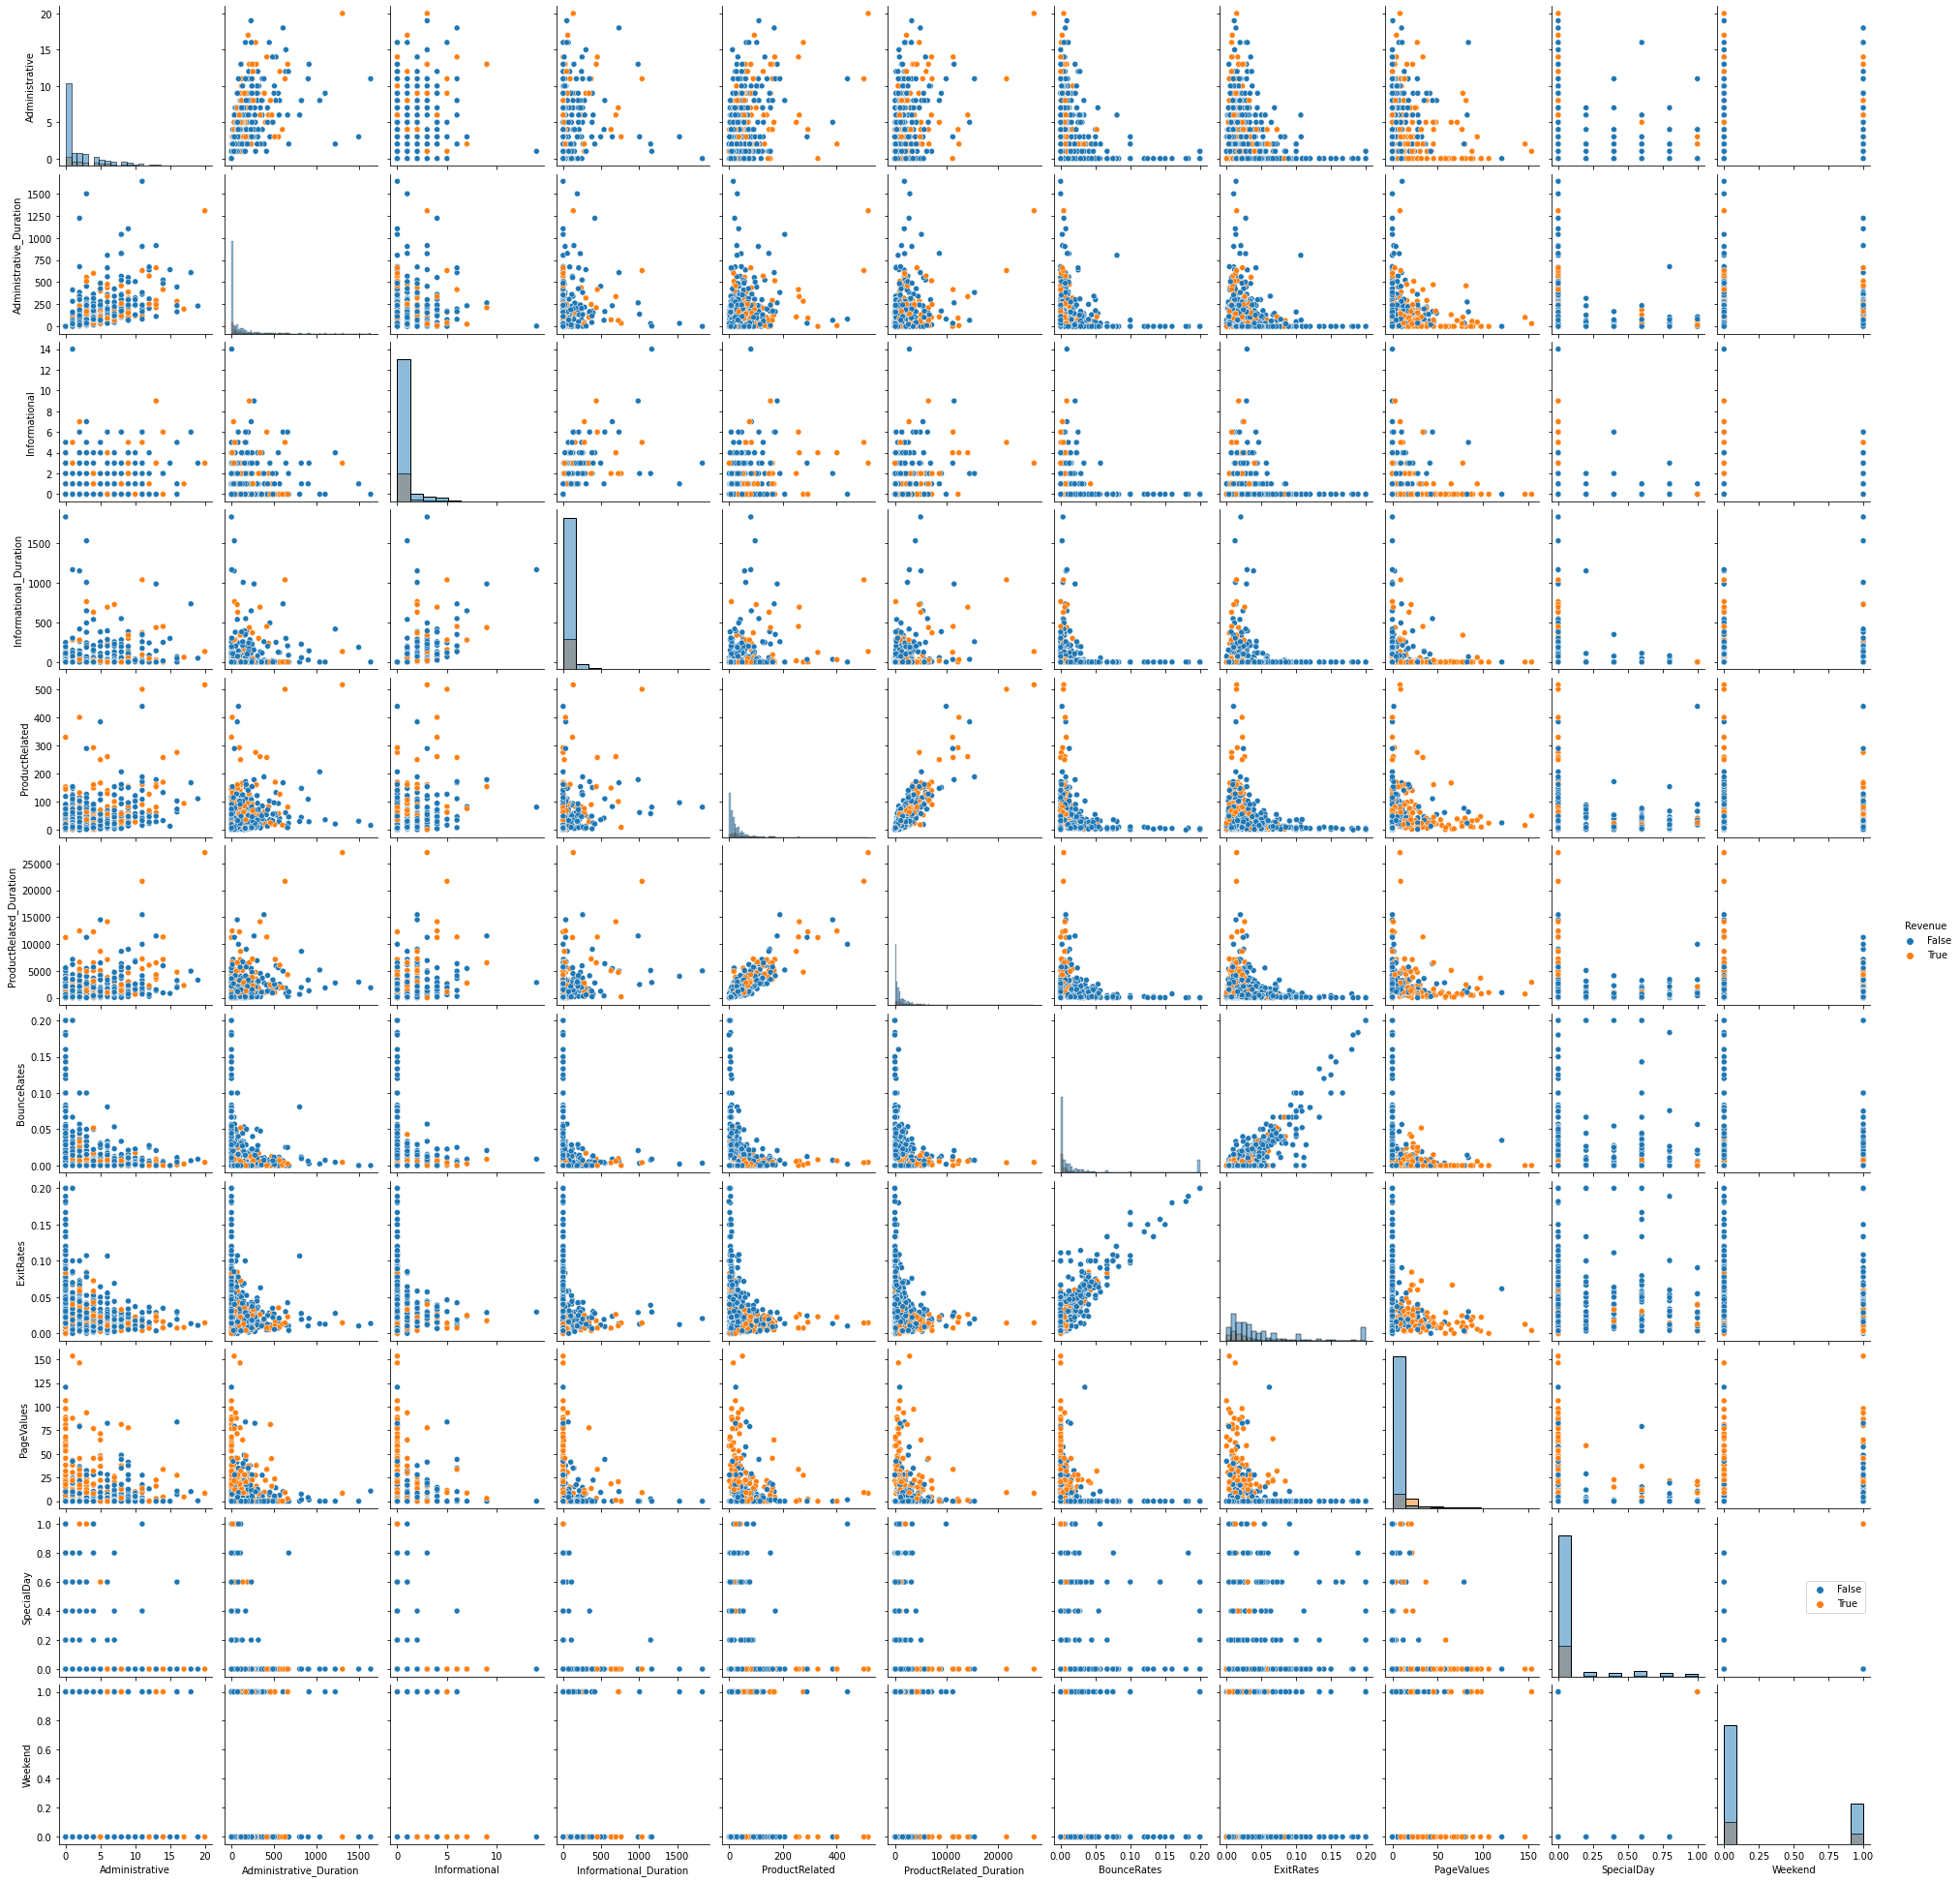

In [18]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
import seaborn as sns
sns.pairplot(data.iloc[random_subset], hue="Revenue", diag_kind='hist')
plt.legend()
pass

На диаграммах отчетливо видно, что большая часть тех, кто сделал покупку, посещали страницы с наибольшим `Page Value`


Построим матрицу корреляций всех признаков:

In [24]:
corr_mat = data.corr()
corr_mat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016767,-0.082305


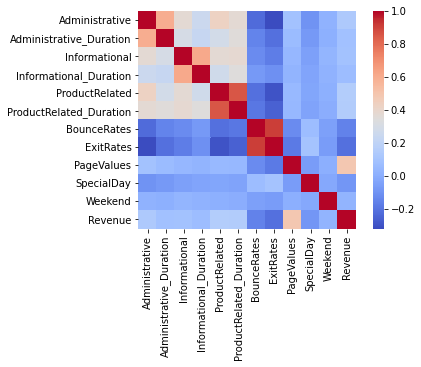

In [25]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Между собой коррелируют, в носновном, признаки касающиеся количества посещенных страниц и времени проведенного на них. Также можно сделать вывод, что  намерение покупки пользователя в главным образом зависит от метрики `Page Value` страницы

In [27]:
corr_mat > 0.4

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,True,True,False,False,True,False,False,False,False,False,False,False
Administrative_Duration,True,True,False,False,False,False,False,False,False,False,False,False
Informational,False,False,True,True,False,False,False,False,False,False,False,False
Informational_Duration,False,False,True,True,False,False,False,False,False,False,False,False
ProductRelated,True,False,False,False,True,True,False,False,False,False,False,False
ProductRelated_Duration,False,False,False,False,True,True,False,False,False,False,False,False
BounceRates,False,False,False,False,False,False,True,True,False,False,False,False
ExitRates,False,False,False,False,False,False,True,True,False,False,False,False
PageValues,False,False,False,False,False,False,False,False,True,False,False,True
SpecialDay,False,False,False,False,False,False,False,False,False,True,False,False


In [30]:
data['Month'].value_counts() 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

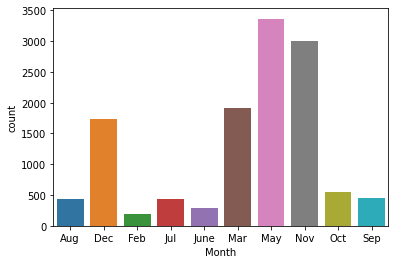

In [29]:
sns.countplot(x='Month', data=data)
pass

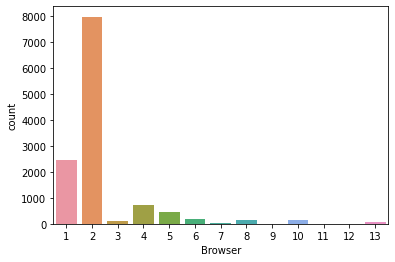

In [31]:
sns.countplot(x='Browser', data=data)
pass

In [32]:
OS_dummies = pd.get_dummies(data['OperatingSystems'])

In [33]:
OS_dummies

,1,2,3,4,5,6,7,8
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12325,0,0,0,1,0,0,0,0
12326,0,0,1,0,0,0,0,0
12327,0,0,1,0,0,0,0,0
12328,0,1,0,0,0,0,0,0


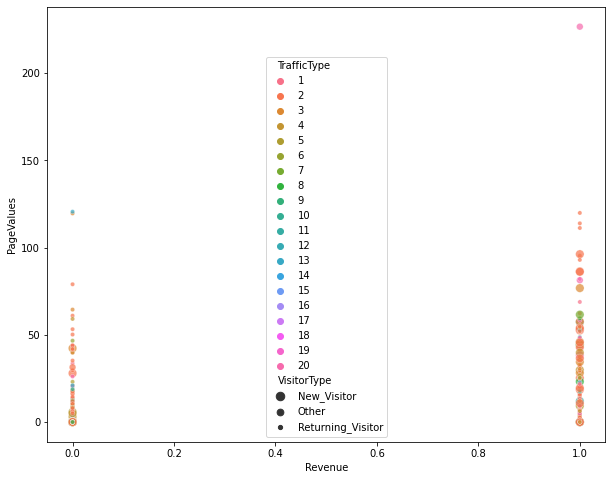

In [35]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Revenue', y='PageValues', size='VisitorType', hue='TrafficType', data=data.iloc[random_subset], alpha=0.7)
pass

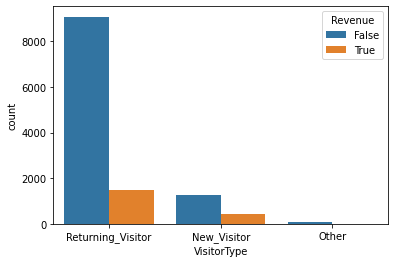

In [36]:
sns.countplot(x='VisitorType', order=data['VisitorType'].value_counts().index, hue='Revenue', data=data)
pass

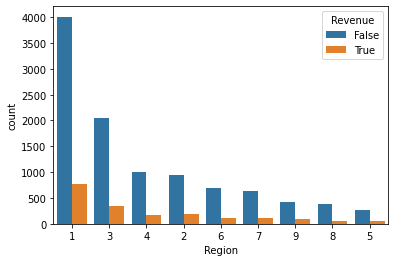

In [37]:
sns.countplot(x='Region', order=data['Region'].value_counts().index, hue='Revenue', data=data)
pass

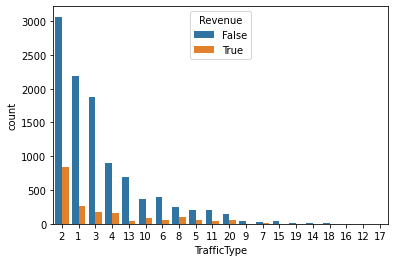

In [42]:
sns.countplot(x='TrafficType', order=data['TrafficType'].value_counts().index, hue='Revenue', data=data)
pass

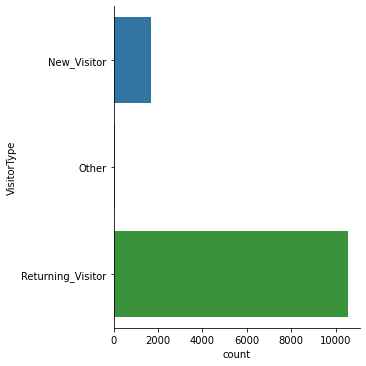

In [39]:
sns.catplot(kind="count", y = "VisitorType", data = data)
pass

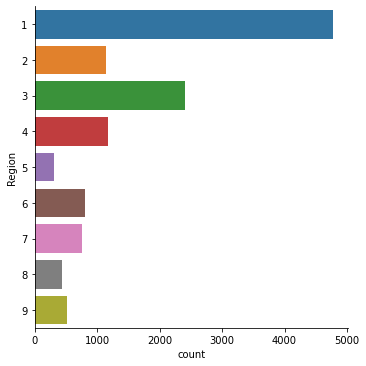

In [40]:
sns.catplot(kind="count", y = "Region", data = data)
pass

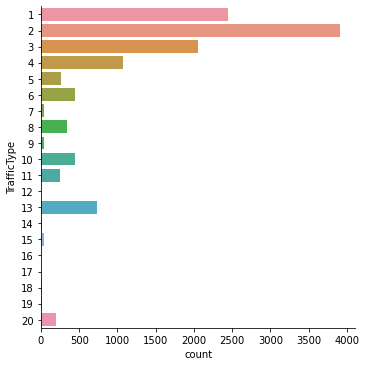

In [41]:
sns.catplot(kind="count", y = "TrafficType", data = data)
pass

## Бинаризация категориальных признаков

In [43]:
visitor_type_dummies = pd.get_dummies(data['VisitorType'])

In [57]:
traffic_type_dummies = pd.get_dummies(data['TrafficType'], prefix='TrafficType')

In [60]:
region_dummies = pd.get_dummies(data['Region'], prefix='Region')

In [63]:
month_dummies = pd.get_dummies(data['Month'])

In [69]:
data_final = pd.concat((data, visitor_type_dummies, traffic_type_dummies, region_dummies, month_dummies), axis=1)
data_final = data_final.drop(['VisitorType', 'TrafficType', 'Region', 'Month', 'Weekend', 'OperatingSystems', 'Browser'], axis=1)

In [70]:
data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,New_Visitor,Other,Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Нормализация данных

In [71]:
data_stand = (data_final - data_final.mean(axis = 0))/data_final.std(axis = 0)

In [72]:
data_stand.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,New_Visitor,Other,Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,7.423727e-16,8.782738e-16,-9.211204e-15,-3.737656e-15,-6.368430e-16,-1.629029e-15,6.875981e-15,1.477086e-14,1.923630e-15,4.968604e-15,8.151585e-15,-2.400639e-15,-1.205426e-14,-3.600400e-15,1.281511e-15,1.166590e-15,1.092216e-14,7.151439e-16,8.777430e-15,-5.052204e-15,-8.907548e-16,-9.726265e-15,-8.710760e-16,-8.643509e-15,-2.997627e-15,-1.056554e-15,-4.309151e-15,1.156140e-15,5.307775e-16,8.274049e-16,-3.108591e-16,-1.665017e-15,-1.742726e-15,-5.695777e-15,-6.968023e-16,-1.776942e-15,-2.990534e-16,1.695229e-16,-2.402872e-16,-3.173392e-15,-2.788524e-16,-1.360726e-15,-9.146698e-15,2.398443e-14,-1.675786e-14,-2.244366e-14,-1.408883e-14,-5.092871e-15,-9.290784e-15,4.343162e-14,-4.463421e-14,-2.033090e-15,1.917515e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.969647e-01,-4.571729e-01,-3.964618e-01,-2.449206e-01,-7.134594e-01,-6.243222e-01,-4.576644e-01,-8.863347e-01,-3.171650e-01,-3.088088e-01,-4.278544e-01,-3.990708e-01,-8.331294e-02,-2.435237e+00,-4.980782e-01,-6.818026e-01,-4.468037e-01,-3.080937e-01,-1.467626e-01,-1.932662e-01,-5.704748e-02,-1.691509e-01,-5.846103e-02,-1.946168e-01,-1.429695e-01,-9.005720e-03,-2.523082e-01,-3.248640e-02,-5.559848e-02,-1.559963e-02,-9.005720e-03,-2.848899e-02,-3.715565e-02,-1.277464e-01,-7.956515e-01,-3.185509e-01,-4.919832e-01,-3.256062e-01,-1.627003e-01,-2.642773e-01,-2.564642e-01,-1.909971e-01,-2.079230e-01,-1.907689e-01,-4.035656e-01,-1.230764e-01,-1.905405e-01,-1.546427e-01,-4.277218e-01,-6.125069e-01,-5.667752e-01,-2.158626e-01,-1.941675e-01
25%,-6.969647e-01,-4.571729e-01,-3.964618e-01,-2.449206e-01,-5.560694e-01,-5.281000e-01,-4.576644e-01,-5.923690e-01,-3.171650e-01,-3.088088e-01,-4.278544e-01,-3.990708e-01,-8.331294e-02,4.106044e-01,-4.980782e-01,-6.818026e-01,-4.468037e-01,-3.080937e-01,-1.467626e-01,-1.932662e-01,-5.704748e-02,-1.691509e-01,-5.846103e-02,-1.946168e-01,-1.429695e-01,-9.005720e-03,-2.523082e-01,-3.248640e-02,-5.559848e-02,-1.559963e-02,-9.005720e-03,-2.848899e-02,-3.715565e-02,-1.277464e-01,-7.956515e-01,-3.185509e-01,-4.919832e-01,

## Отбор признаков

In [79]:
X = data_stand.drop(['Revenue'], axis=1)
y = data['Revenue'].astype('int')

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(9247, 3083)

## KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

lr_model = KNeighborsClassifier()
lr_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error, accuracy_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
accuracy_train =  accuracy_score(y_train,  y_train_predict)
accuracy_test =  accuracy_score(y_test,  y_test_predict)

print("MSE train : {}, MSE test: {}".format(MSE_train, MSE_test))
print("accuracy train: {}, accuracy test: {}".format(accuracy_train, accuracy_test))

MSE train : 0.11409105655888396, MSE test: 0.1440155692507298
accuracy train: 0.885908943441116, accuracy test: 0.8559844307492702


## SVM

In [84]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
y_train_predict = clf.predict(X_train)
y_test_predict  = clf.predict(X_test)

In [92]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
accuracy_train =  accuracy_score(y_train,  y_train_predict)
accuracy_test =  accuracy_score(y_test,  y_test_predict)

print("MSE train : {}, MSE test: {}".format(MSE_train, MSE_test))
print("accuracy train: {}, accuracy test: {}".format(accuracy_train, accuracy_test))

MSE train : 0.0988428679571753, MSE test: 0.11871553681479079
accuracy train: 0.9011571320428247, accuracy test: 0.8812844631852093


## Выводы

KNN достаточно хорошо показал себя в решении задачи классификации, однако метод опорных векторов показал результаты получше.